## Домашняя работа #2.
Эта домашка про Фурье и немного про простейшие фильтры.

Ссылка на материалы: https://drive.google.com/drive/folders/1ZHo9MpdaOS1Qwc_F342wTByJNX0eHKmN?usp=sharing

In [ ]:
# ПРИМОНТИРУЙТЕ ДИСК К НОУТБУКУ
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path
# ИЗМЕНИТЕ ЭТОТ ПУТЬ НА ТОТ, КУДА ВЫ ПОЛОЖИЛИ МАТЕРИАЛЫ КУРСА
sources_path = Path("/content/drive/MyDrive/Материалы")

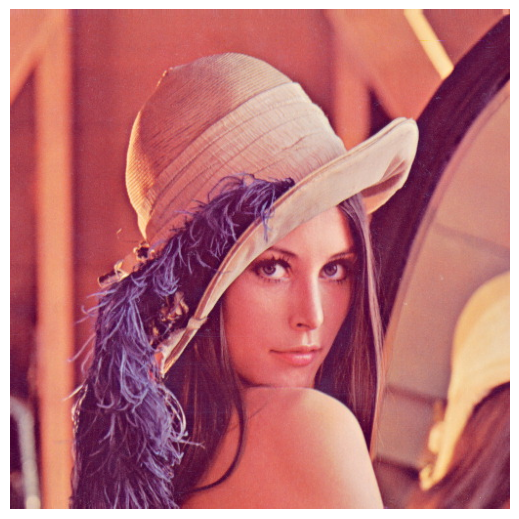

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=(10, 5))
        ax = plt.axes([0,0,1,1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)
    return make_pyplot_context

@pyplot
def show_bgr(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

@pyplot
def show_gray(img):
    plt.imshow(img, cmap='gray')

def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()

lena = cv2.imread(str(sources_path / "lena.jpg"))
show_bgr(lena)


**1. (5 баллов)**

Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

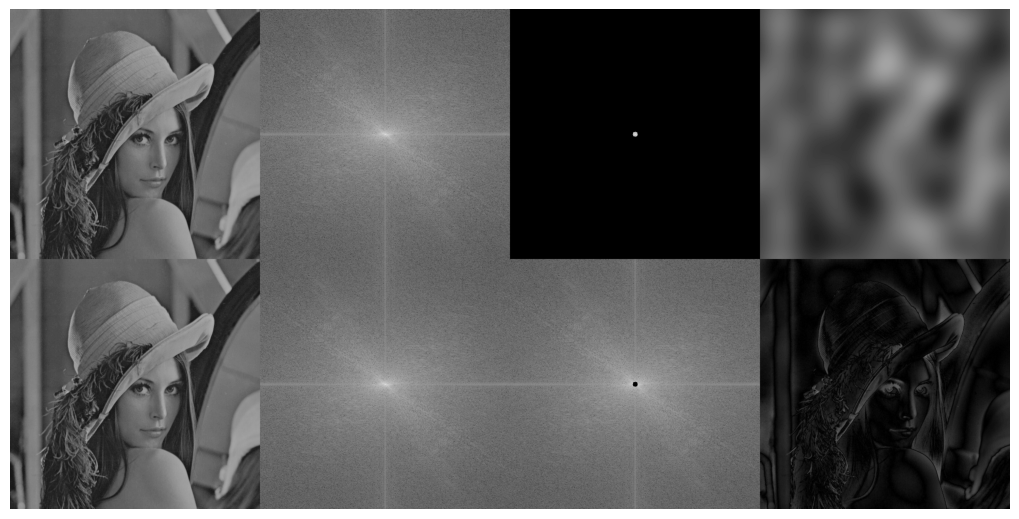

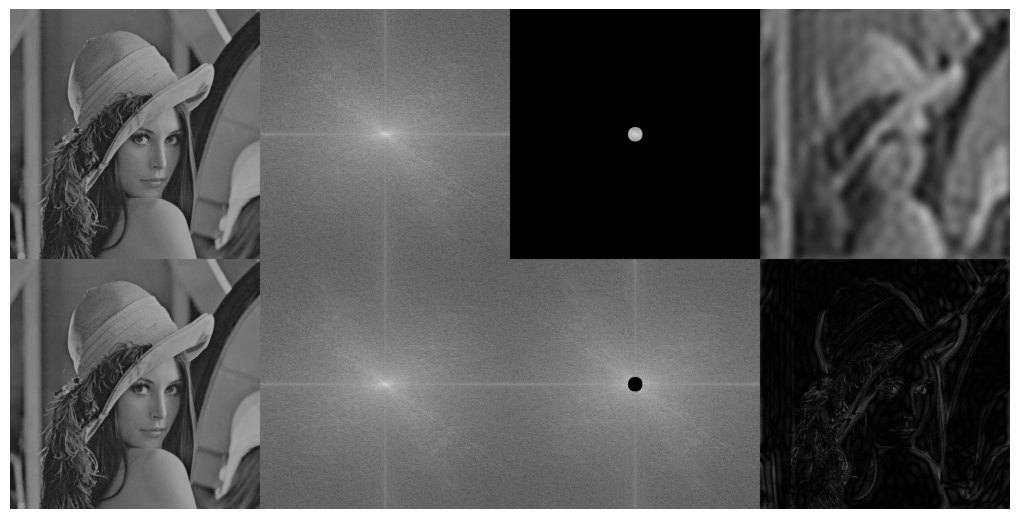

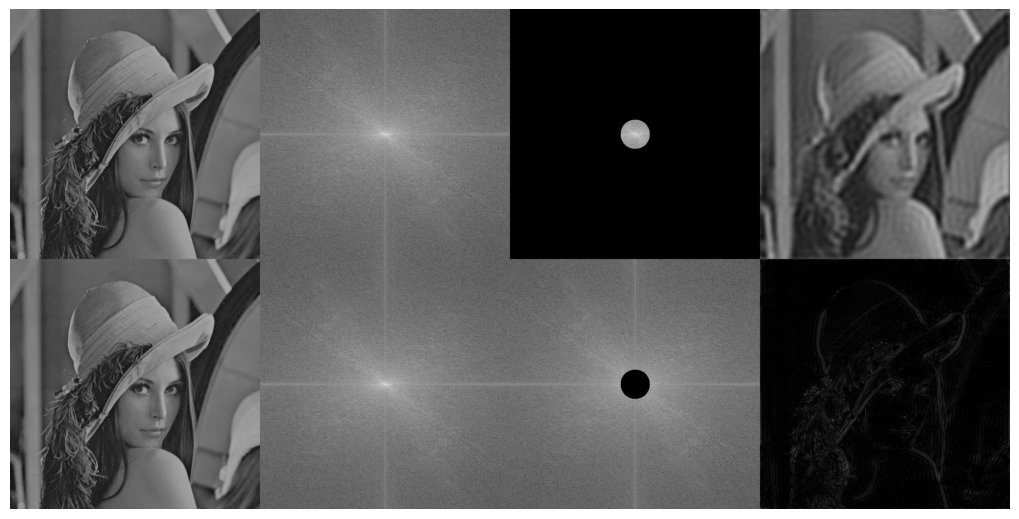

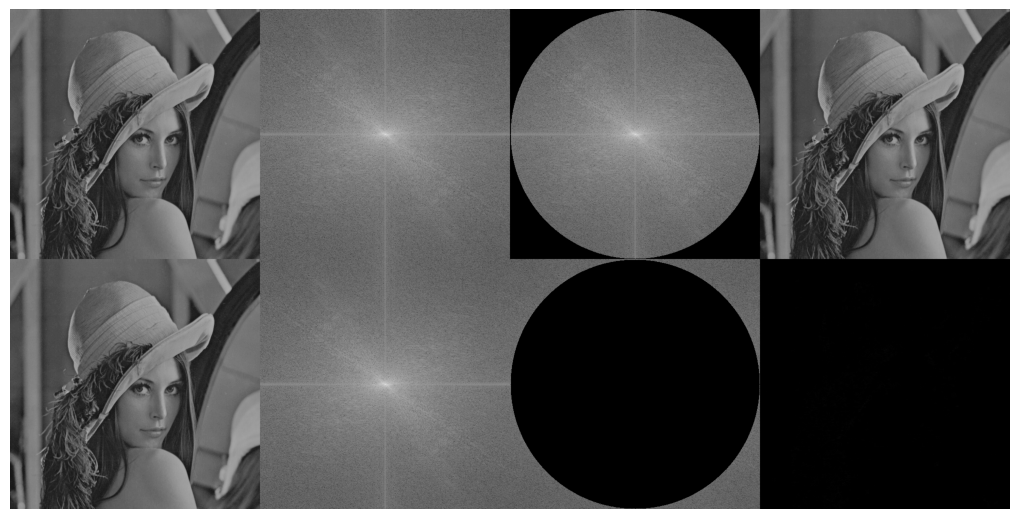

In [ ]:
lena_gray=cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_fft=np.fft.fftshift(np.fft.fft2(lena_gray))
lena_fft_visual=20*np.log1p(np.abs(lena_fft))

R=[5,15,30,255]
for r in R:
    H=512
    W=512
    mask_high=np.zeros((H,W))
    mask_low=np.zeros((H,W))
    for i in range(H):
        for j in range(W):
            if np.sqrt((i-H/2)**2+(j-W/2)**2)<=r:
                mask_low[i,j]=1
            else:
                mask_high[i,j]=1

    lena_fft_filter_low=lena_fft*mask_low
    lena_fft_filter_high=lena_fft*mask_high
    lena_fft_filter_low_visual=20*np.log1p(np.abs(lena_fft_filter_low))
    lena_fft_filter_high_visual=20*np.log1p(np.abs(lena_fft_filter_high))
    lena_filter_low = np.abs(np.fft.ifft2(np.fft.ifftshift(lena_fft_filter_low))).astype('uint8')
    lena_filter_high = np.abs(np.fft.ifft2(np.fft.ifftshift(lena_fft_filter_high))).astype('uint8')

    show_gray(np.vstack([
        np.hstack([lena_gray.astype(int), lena_fft_visual.astype(int), lena_fft_filter_low_visual.astype(int), lena_filter_low.astype(int)]),
        np.hstack([lena_gray.astype(int), lena_fft_visual.astype(int), lena_fft_filter_high_visual.astype(int), lena_filter_high.astype(int)])
        ])
    )

**2. (5 баллов)**

Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$.

1275.144889831543


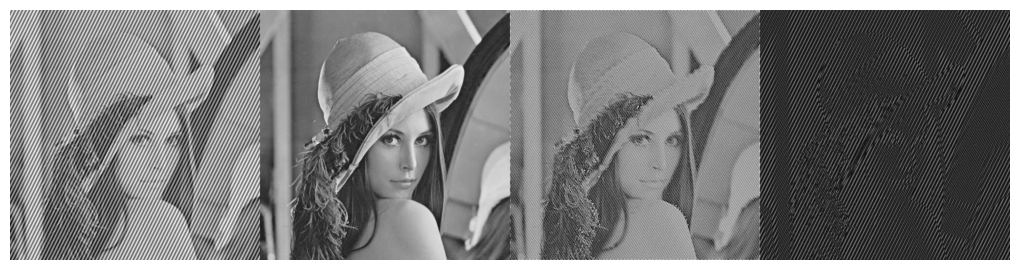

In [ ]:
def gamma_fun(img,c, gamma):
    return (c * ((img / 255) ** gamma) * 255).astype("uint8")

lena_diag = cv2.imread(str(sources_path / "lena_diagonal.jpg"), 0)
lena_gray_fix = cv2.imread(str(sources_path / "lena_gray_512.tif"), 0)

kernel=np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
diag = cv2.filter2D(lena_diag, -1, kernel)
lena_clear=lena_diag-diag
lena_clear=gamma_fun(lena_clear,1.03,0.7)

print(mse(lena_clear, lena_gray_fix))
show_gray(np.hstack([lena_diag.astype(int), lena_gray_fix.astype(int), lena_clear.astype(int), np.abs(lena_diag.astype(int) - lena_gray_fix.astype(int))]))

**3. (10 баллов)**

Теперь предложите решение, которое бы работало для любого шума подобной природы. (синусоида некотрой частоты под некоторым углом) Смоделируйте изображение с шумом и предложите универсальный алгоритм, который решит задачу.
Тот, у кого по результатам проверки будет наименьшее значение MSE для предлженной картинки, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)
Учтите, что помимо синусоидального шума, могут быть применены другие преобразования яркости.

---

Уточнение того, что требуется сделать:

* написать параметризованный генератор шума, которому можно задать произвольный угол, частоту полос и силу перекрытия, и получить шум с заданными параметрами

* усовершенствовать алгоритм из второй задачи, чтобы он работал на произвольных параметрах шума; тут полезно сделать интерактивный виджет, с помощью которого можно менять параметры шума и смотреть как справляется с ним алгоритм; интерактивный виджет проще всего сделать так:

    ```python
    from ipywidgets import interact

    @interact(angle=(0, 360, 1), freq=(1, 64, 1))
    def anim_general_solution(angle=45, freq=32):
        # visualization code here
    ```

* после обобщенным алгоритмом отчистить изображение из задачи 2 и посчитать MSE с чистым изображением, по этому MSE и будет конкурс за призовую шоколадку

In [ ]:
def add_noise(img, freq, angle,streng):
    X,Y=np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    angle = np.radians(angle)
    noise = np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) * freq
    )
    noise=((noise+1)/2)
    return noise*streng+img

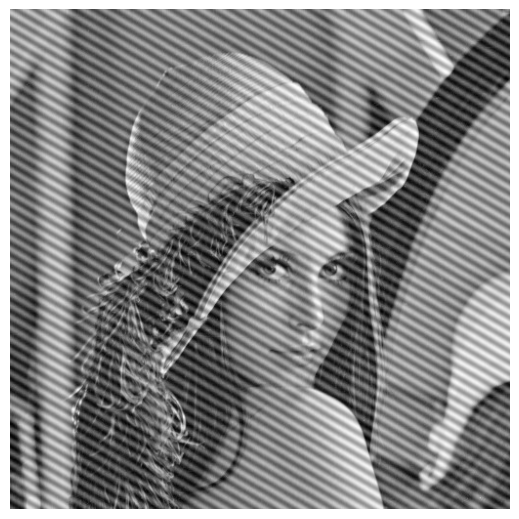

In [ ]:
lena_noise=add_noise(lena_gray, freq=0.1, angle=120, streng=100)
show_gray(lena_noise)

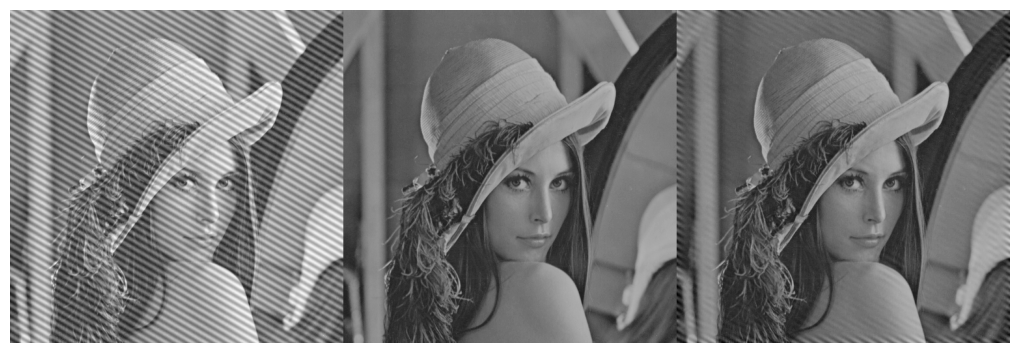

In [ ]:
def denoise(lena_noise):
    lena_fft=np.fft.fftshift(np.fft.fft2(lena_noise))
    lena_fft_visual=20*np.log1p(np.abs(lena_fft))

    edges=cv2.Canny(np.uint8(lena_fft_visual), 400, 400)
    edges
    H,W=edges.shape
    mask=np.ones((H,W))*255
    r=20
    for i in range(H):
        for j in range(W):
            if np.sqrt((i-H//2)**2+(j-W//2)**2)<=r:
                mask[i,j]=0
    edges=mask*edges
    args = np.argwhere(edges != 0)
    for i, j in args:
        lena_fft[i-5:i+5, j-5:j+5] = 0
    lena_fft_visual=20*np.log1p(np.abs(lena_fft))
    lena_new=np.abs(np.fft.ifft2(np.fft.ifftshift(lena_fft)))
    return lena_new

lena_new=denoise(lena_noise)-50 #просто в ручную так яркость скорректировал
show_gray(np.hstack([lena_noise.astype(int),lena_gray_fix.astype(int), lena_new.astype(int)]))

644.1911430358887


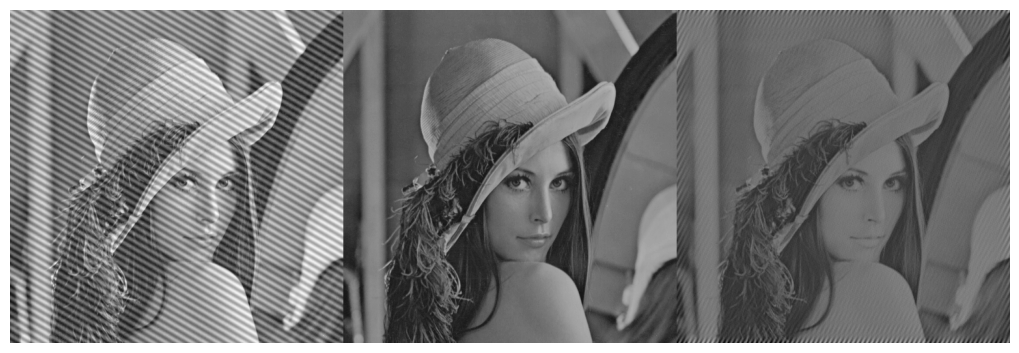

In [ ]:
lena_test=denoise(lena_diag)-15
show_gray(np.hstack([lena_noise.astype(int),lena_gray_fix.astype(int), lena_test.astype(int)]))
print(mse(lena_test, lena_gray))

**4. (5 баллов)**

Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

Простой способ:

138.5370610555013


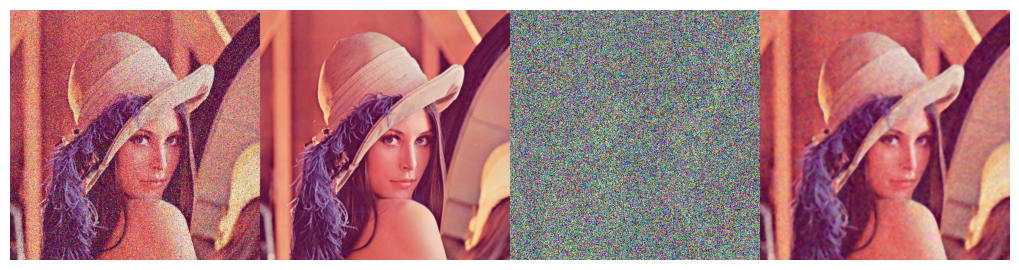

In [ ]:
img_noised = cv2.imread(str(sources_path / "lena_color_512-noise.tif"))
img_colored = cv2.imread(str(sources_path / "lena_color_512.tif"))

img_new=cv2.medianBlur(cv2.medianBlur(img_noised,5),5)
print(mse(img_new, img_colored))
show_bgr(np.hstack([img_noised, img_colored, np.abs(img_noised - img_colored), img_new]))

Читерский способ:

In [ ]:
import torch
from torch import nn
from torch.optim import Adam
import os
import random
import numpy as np

In [ ]:
class DnCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1, bias=False)
        self.relu1 = nn.ReLU(inplace=True)
        hidden_layers = []
        for i in range(18):
            hidden_layers.append(nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, bias=False))
            hidden_layers.append(nn.BatchNorm2d(64))
            hidden_layers.append(nn.ReLU(inplace=True))
        self.mid_layer = nn.Sequential(*hidden_layers)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=3, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.relu1(self.conv1(x))
        out = self.mid_layer(out)
        out = self.conv3(out)
        return out

    def save(self):
        torch.save(self.state_dict(), "model.pth")

    def load(self):
        self.load_state_dict(torch.load(__file__[:-7] + "/model.pth"))

In [ ]:
dncnn = DnCNN()

checkpoint = torch.load('model_denoise2.pth',map_location=torch.device('cpu'))
dncnn.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [ ]:
x = torch.tensor(img_noised).to(torch.float32)
x=x.transpose(0, 2) / 255. - 1
x=x.unsqueeze(0)
dncnn.cpu()
lena_new = dncnn(x)

4.6612294514973955


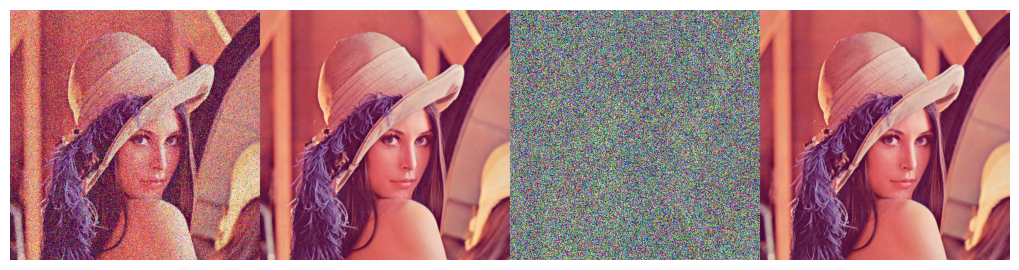

In [ ]:
lena_out=lena_new.squeeze(0)
lena_out=((lena_out+1)*255).transpose(2, 0)
lena_out=lena_out.detach().numpy()
lena_out=lena_out.astype('uint8')
print(mse(lena_out, img_colored))
show_bgr(np.hstack([img_noised, img_colored, np.abs(img_noised - lena_out), lena_out]))

**5. (5 баллов)**

Выделите границы на изображении **cat.jpg**:

* при помощи градиента и фильтров собеля
* при помощи лапласиана
* используя алгоритм $canny$

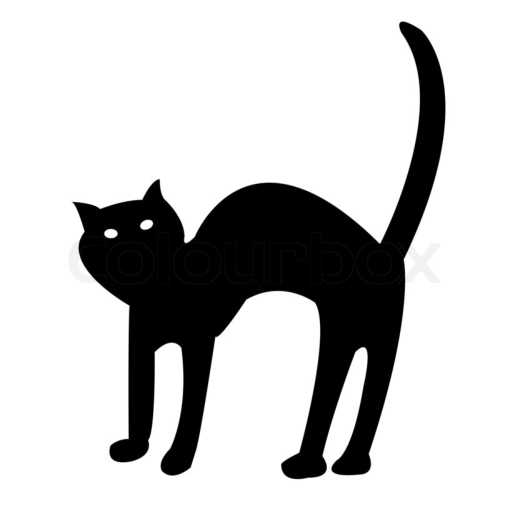

In [ ]:
img = cv2.imread(str(sources_path / "cat.jpg"), 0)
show_gray(img)

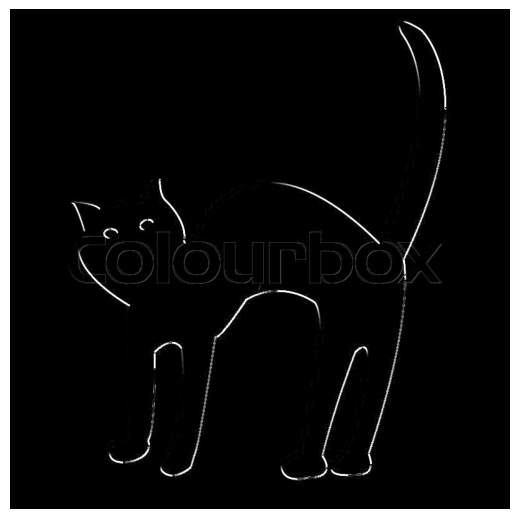

In [ ]:
def sobel_edge_detection(img):
    f_x = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
    f_y = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    res = cv2.filter2D(img,-1,f_x) + cv2.filter2D(img,-1,f_y)
    return res

edges_sobel=sobel_edge_detection(img)
show_gray(edges_sobel)

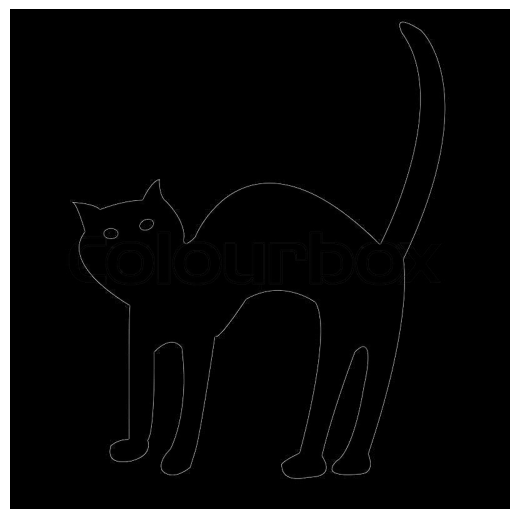

In [ ]:
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
edges_laplas = cv2.filter2D(img, -1, kernel)
show_gray(edges_laplas)

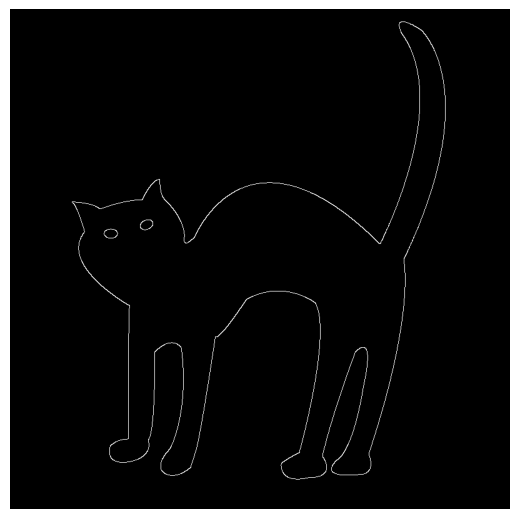

In [ ]:
edges_canny = cv2.Canny(img,100,200)
show_gray(edges_canny)